In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
file_path = '../data/processed.csv'
df = pd.read_csv(file_path)
df.columns

Index(['Unnamed: 0', 'id', 'stmt_date', 'HQ_city', 'legal_struct',
       'ateco_sector', 'def_date', 'fs_year', 'asst_intang_fixed',
       'asst_tang_fixed', 'asst_fixed_fin', 'asst_current', 'AR',
       'cash_and_equiv', 'asst_tot', 'eqty_tot', 'eqty_corp_family_tot',
       'liab_lt', 'liab_lt_emp', 'debt_bank_st', 'debt_bank_lt', 'debt_fin_st',
       'debt_fin_lt', 'AP_st', 'AP_lt', 'debt_st', 'debt_lt', 'rev_operating',
       'COGS', 'prof_operations', 'goodwill', 'inc_financing', 'exp_financing',
       'prof_financing', 'inc_extraord', 'taxes', 'profit', 'days_rec',
       'ebitda', 'roa', 'roe', 'wc_net', 'margin_fin', 'cf_operations',
       'train_test_flag', 'default', 'asst_tot_quantile',
       'asst_tot_quantile_values', 'liab_tot', 'financial_leverage',
       'financial_leverage_quantile', 'financial_leverage_quantile_values',
       'profitability_ratio', 'profitability_ratio_quantile',
       'profitability_ratio_quantile_values', 'roe_quantile',
       'roe_quant

In [3]:
df.columns[df.columns.str.contains('quantile')]

Index(['asst_tot_quantile', 'asst_tot_quantile_values',
       'financial_leverage_quantile', 'financial_leverage_quantile_values',
       'profitability_ratio_quantile', 'profitability_ratio_quantile_values',
       'roe_quantile', 'roe_quantile_values', 'net_income_growth_quantile',
       'net_income_growth_quantile_values', 'quick_ratio_v2_quantile',
       'quick_ratio_v2_quantile_values', 'sales_growth_quantile',
       'sales_growth_quantile_values', 'cash_assets_ratio_quantile',
       'cash_assets_ratio_quantile_values', 'dscr_quantile',
       'dscr_quantile_values', 'cfo_quantile', 'cfo_quantile_values'],
      dtype='object')

In [4]:
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler

## functions

In [5]:
def viz(cut_data, field, quantiles = 20):
    
    cut, bins = pd.qcut(cut_data, q=quantiles, labels=False, retbins=True, duplicates = 'drop')
    cut+=1# Adding 1 to make quantiles start from 1
    default_prob_values = df.groupby(cut)[['default']].mean()
    # print(bins)
    plt.figure(figsize=(8, 6))
    plt.plot(default_prob_values.index, default_prob_values.default, marker='o', linestyle='-', color='b')
    plt.title(f'Conditional Mean by {field}')
    plt.xlabel(field)
    plt.ylabel('Default Probability')
    plt.grid(True)
    plt.show()
    return bins

In [6]:
def generate_split_features(field, cut_point, bins = 45):
    print(df[field].describe())
    print(df[['id',field,'default']].sort_values(field).tail(10))
    print(df[['id',field,'default']].sort_values(field).head(10))

    print('Only those that defaulted:')
    print(df[df['default']==1][[field,'default']].sort_values(field).tail(10))
    
    print(field)
    sns.kdeplot(df[field])
    
    
    cut_data = df[df[field]>cut_point][field]
    first_bins = viz(cut_data, field, bins)

    
    cut_data = df[df[field]<=cut_point][field]
    second_bins = viz(cut_data, field, 10)

    return np.concatenate((first_bins, second_bins))


## Financial leverage

count   1023552.00
mean          0.68
std           0.35
min          -0.41
25%           0.49
50%           0.75
75%           0.91
max          97.08
Name: financial_leverage, dtype: float64
                id  financial_leverage  default
768916  8154400587               26.42        0
481645  2739510721               28.10        0
481646  2739510721               28.67        0
481648  2739510721               28.69        0
481647  2739510721               28.81        0
445748  2483570103               51.06        0
445749  2483570103               57.14        0
445750  2483570103               65.76        0
445751  2483570103               81.44        0
992805  2483570103               97.08        0
                 id  financial_leverage  default
642267   4391361211               -0.41        0
766627   8049760583               -0.41        0
766626   8049760583               -0.39        0
894979   8049760583               -0.38        0
766625   8049760583               

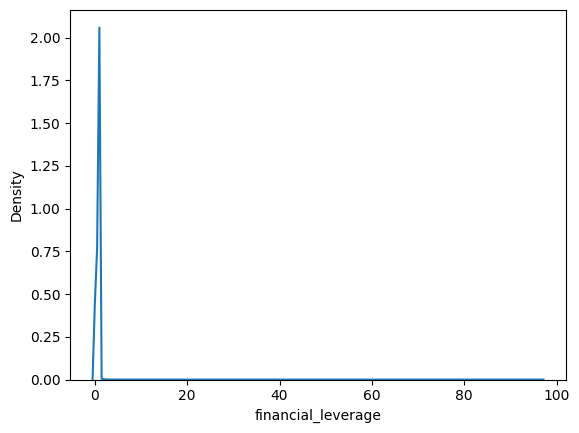

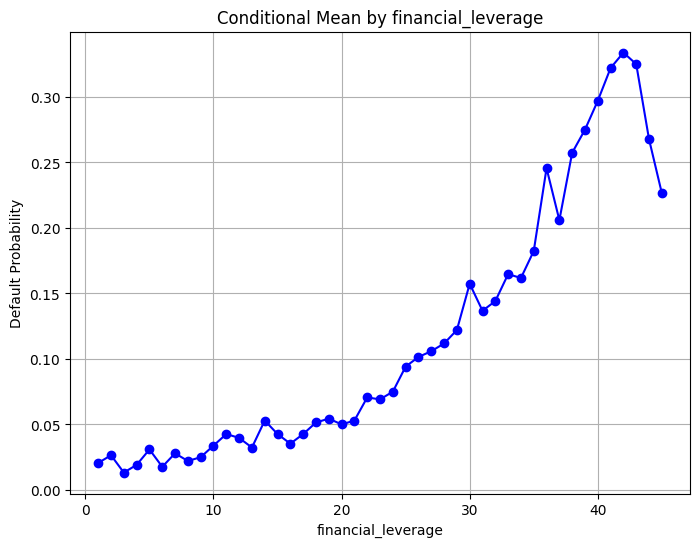

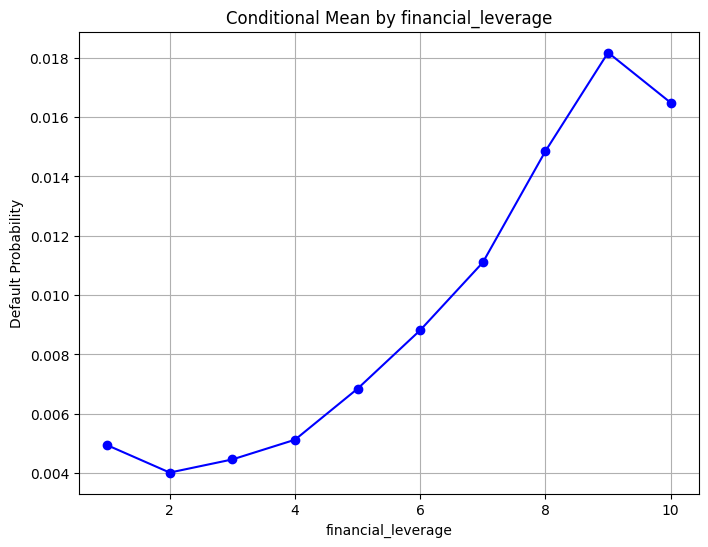

In [7]:
field = 'financial_leverage'
bins = generate_split_features(field, 1)

In [8]:
financial_leverage_bins = sorted(bins)

1.0079852277977512 97.07777557416392


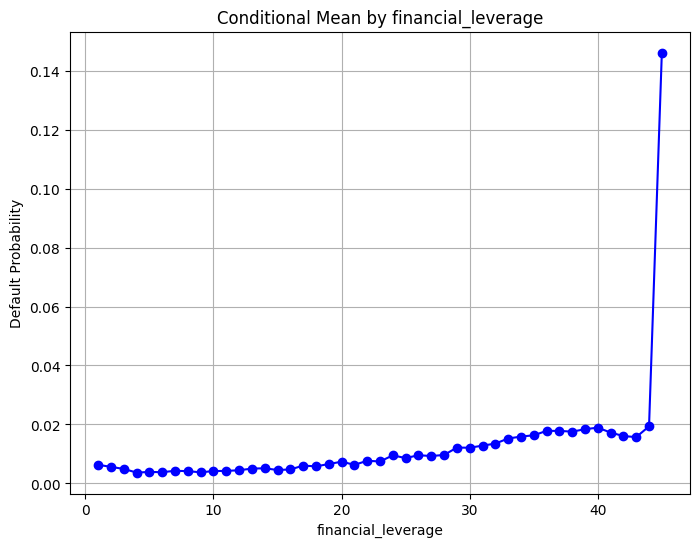

In [9]:
cut, bins = pd.qcut(df[field], q=45, labels=False, retbins=True, duplicates = 'drop')
cut+=1# Adding 1 to make quantiles start from 1
default_prob_values = df.groupby(cut)[['default']].mean()
# print(bins)
print(bins[-2],bins[-1])
plt.figure(figsize=(8, 6))
plt.plot(default_prob_values.index, default_prob_values.default, marker='o', linestyle='-', color='b')
plt.title(f'Conditional Mean by {field}')
plt.xlabel(field)
plt.ylabel('Default Probability')
plt.grid(True)
plt.show()

In [10]:
# custom_bins

1.0079852277977512 97.07777557416392


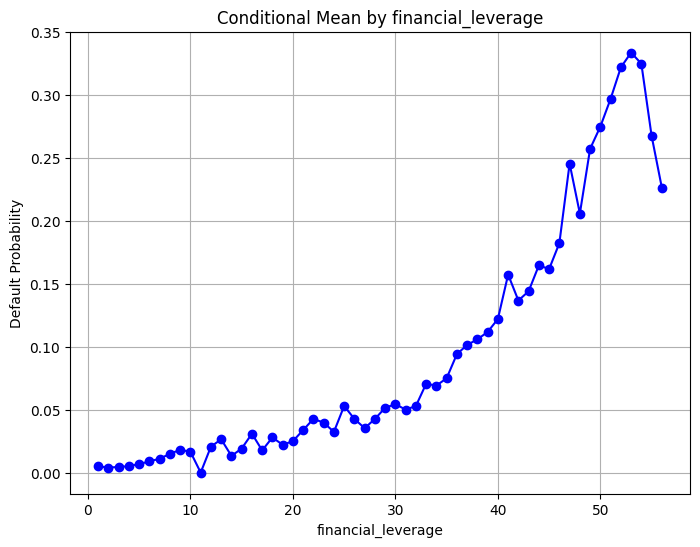

In [11]:
cut = pd.cut(df[field],bins=financial_leverage_bins, labels=False)
cut+=1# Adding 1 to make quantiles start from 1
min_bin_values = df.groupby(cut)[field].mean()
default_prob_values = df.groupby(cut)[['default']].mean()
# print(bins)
print(bins[-2],bins[-1])
plt.figure(figsize=(8, 6))
plt.plot(default_prob_values.index, default_prob_values.default, marker='o', linestyle='-', color='b')
plt.title(f'Conditional Mean by {field}')
plt.xlabel(field)
plt.ylabel('Default Probability')
plt.grid(True)
plt.show()

## profitability ratio

count   1023552.00
mean          0.01
std           0.13
min         -41.42
25%          -0.01
50%           0.00
75%           0.02
max           7.94
Name: profitability_ratio, dtype: float64
                 id  profitability_ratio  default
673816   5074410480                 1.28        0
591027   3669010104                 1.38        0
752622   7444571009                 1.45        0
708396   5874100968                 1.52        0
31721     204140719                 1.66        0
94752     620130377                 2.33        0
529494   3135330177                 2.88        0
830962  13283740150                 3.59        0
468349   2637090966                 5.04        0
292719   1713850152                 7.94        0
                id  profitability_ratio  default
708415  5874340960               -41.42        1
634409  4231760960               -23.33        0
929857  6278030488               -18.39        0
629237  4150500967               -15.89        0
588332  364

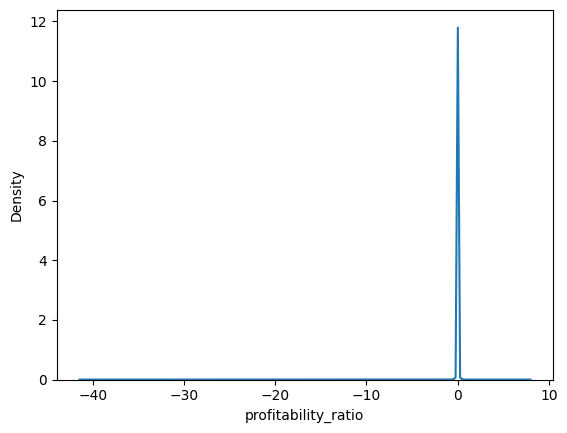

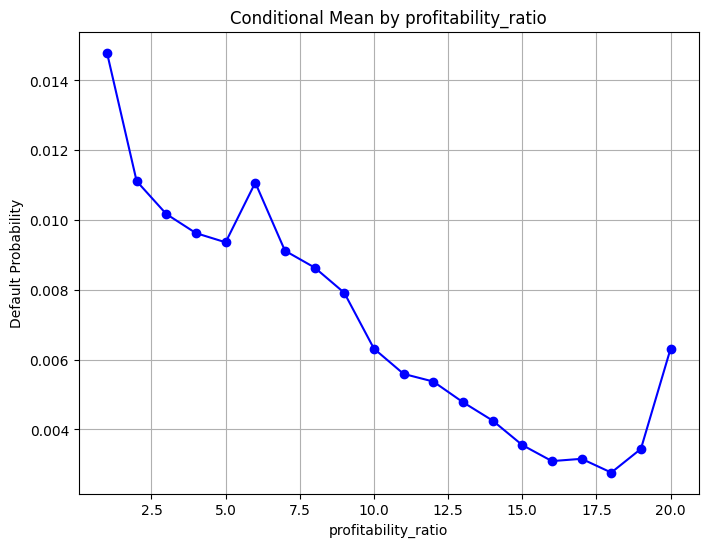

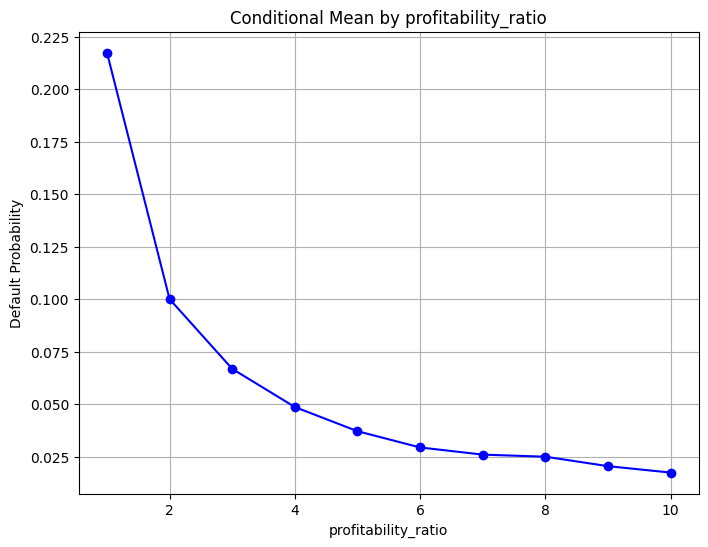

In [12]:
field = 'profitability_ratio'
profitability_ratio_bins = generate_split_features(field, -0.03, bins=20)
profitability_ratio_bins = sorted(profitability_ratio_bins)

In [13]:
field = 'profitability_ratio'

In [14]:
df[field].describe()

count   1023552.00
mean          0.01
std           0.13
min         -41.42
25%          -0.01
50%           0.00
75%           0.02
max           7.94
Name: profitability_ratio, dtype: float64

In [15]:
cut_data = df[df[field]>0.2][field]

In [16]:
cut, bins = pd.qcut(cut_data, q=10, labels=False, retbins=True, duplicates = 'drop')
cut+=1# Adding 1 to make quantiles start from 1
default_prob_values = df.groupby(cut)[['default']].mean()

(14741,)


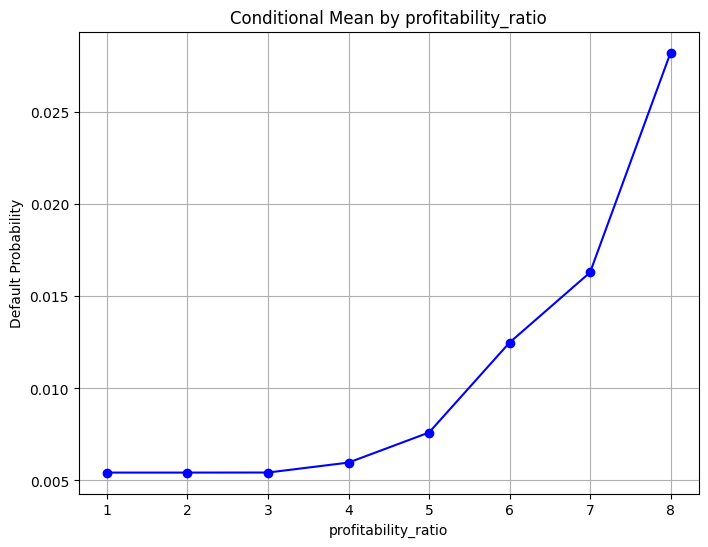

array([0.20000239, 0.21289264, 0.22871378, 0.24831899, 0.27386915,
       0.31104   , 0.37207975, 0.50262407, 7.93641684])

In [17]:
cut_data = df[df[field]>0.2][field]
print(cut_data.shape)
first_bins = viz(cut_data, field, 8)
first_bins

(797456,)


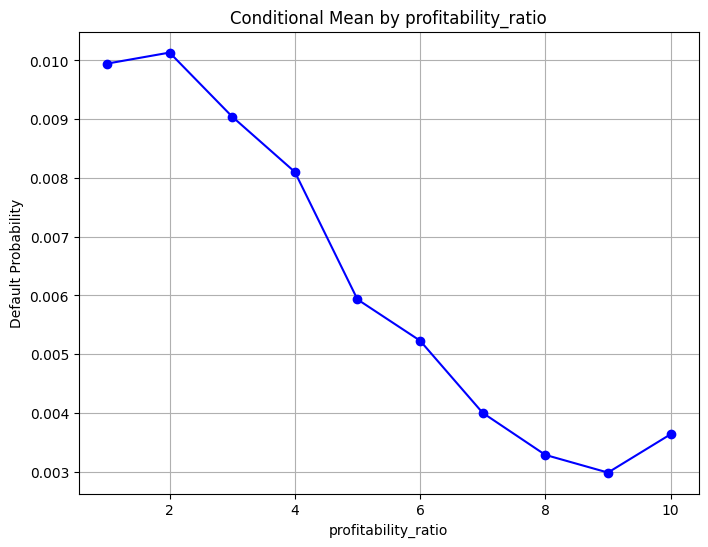

array([-9.99990874e-03, -3.62861897e-03,  1.22476330e-04,  1.42407074e-03,
        3.56592804e-03,  6.92056370e-03,  1.21718160e-02,  2.06264370e-02,
        3.53827909e-02,  6.59847802e-02,  1.99995700e-01])

In [18]:
cut_data = df[(df[field]>-0.01)&(df[field]<=0.2)][field]
print(cut_data.shape)
second_bins = viz(cut_data, field, 10)
second_bins

(189703,)


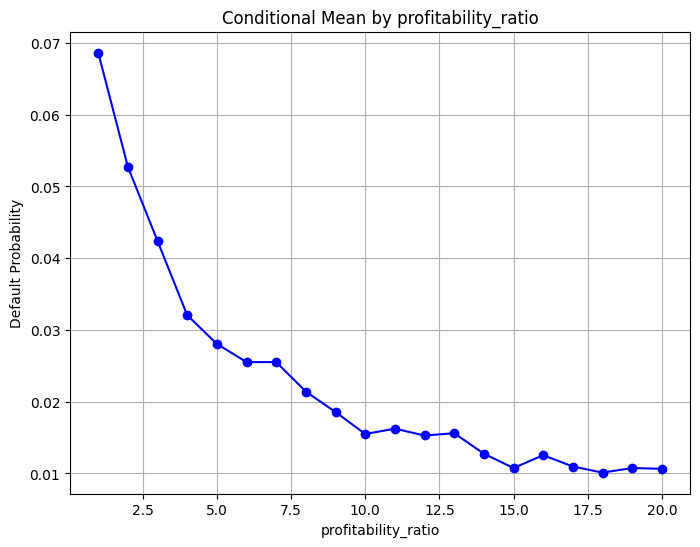

array([-0.14999835, -0.11103517, -0.08782072, -0.07178804, -0.06042051,
       -0.05196263, -0.04525847, -0.03982049, -0.03528901, -0.03149454,
       -0.02816415, -0.02530926, -0.0228213 , -0.02056688, -0.01858067,
       -0.01673347, -0.01509957, -0.01363524, -0.0123228 , -0.01110662,
       -0.0100002 ])

In [19]:
cut_data = df[(df[field]>-0.15)&(df[field]<=-0.01)][field]
print(cut_data.shape)
third_bins = viz(cut_data, field, 20)
third_bins

(20848,)


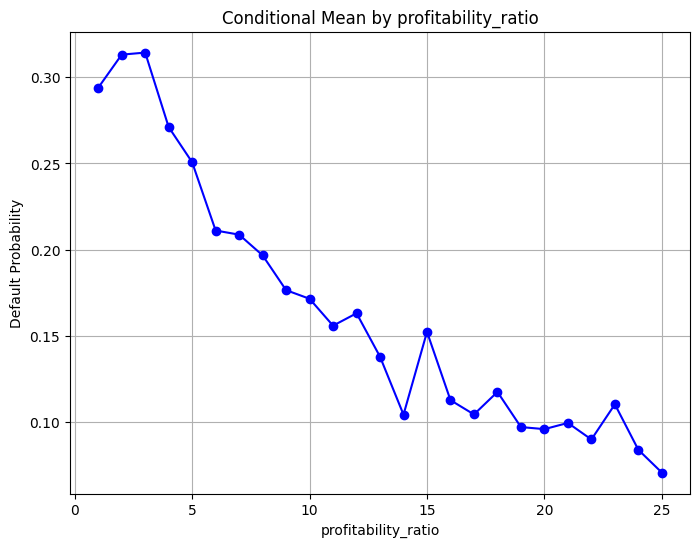

array([-41.42000571,  -1.26025102,  -0.87489608,  -0.69609607,
        -0.58419209,  -0.50754582,  -0.4473529 ,  -0.40153439,
        -0.36505046,  -0.3356755 ,  -0.31135537,  -0.28986436,
        -0.27236218,  -0.25786791,  -0.24416041,  -0.2315545 ,
        -0.22031419,  -0.21044747,  -0.20105249,  -0.1930317 ,
        -0.18578875,  -0.17819726,  -0.17166862,  -0.16564188,
        -0.16008447,  -0.15500357])

In [20]:
cut_data = df[(df[field]>-1000)&(df[field]<-0.155)][field]
print(cut_data.shape)
fourth_bins = viz(cut_data, field, 25)
fourth_bins

In [21]:
prof_ratio_bins = np.concatenate((first_bins, second_bins, third_bins, fourth_bins))
prof_ratio_bins = sorted(prof_ratio_bins)

0.161220802550527 7.936416843027074


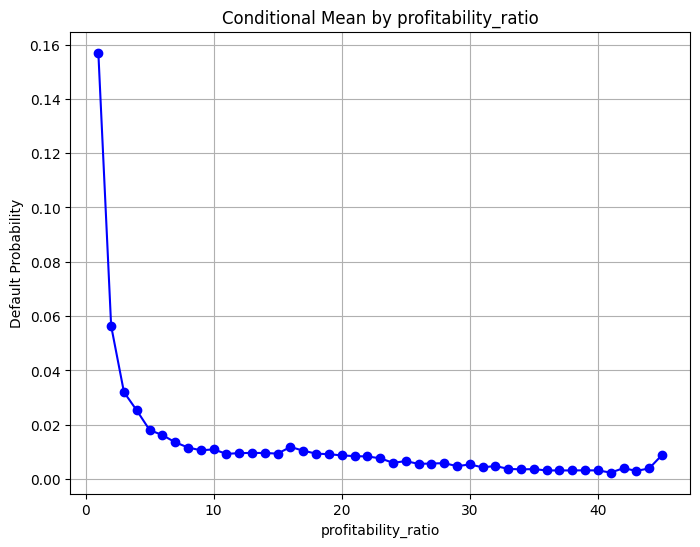

In [22]:
cut, bins = pd.qcut(df[field], q=45, labels=False, retbins=True, duplicates = 'drop')
cut+=1# Adding 1 to make quantiles start from 1
default_prob_values = df.groupby(cut)[['default']].mean()
# print(bins)
print(bins[-2],bins[-1])
plt.figure(figsize=(8, 6))
plt.plot(default_prob_values.index, default_prob_values.default, marker='o', linestyle='-', color='b')
plt.title(f'Conditional Mean by {field}')
plt.xlabel(field)
plt.ylabel('Default Probability')
plt.grid(True)
plt.show()

0.161220802550527 7.936416843027074


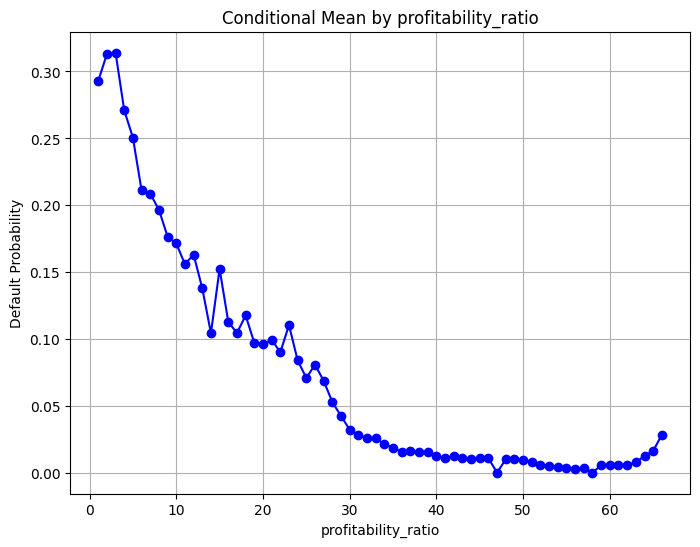

In [23]:
cut = pd.cut(df[field],bins=prof_ratio_bins, labels=False)
cut+=1# Adding 1 to make quantiles start from 1
default_prob_values = df.groupby(cut)[['default']].mean()
# print(bins)
print(bins[-2],bins[-1])
plt.figure(figsize=(8, 6))
plt.plot(default_prob_values.index, default_prob_values.default, marker='o', linestyle='-', color='b')
plt.title(f'Conditional Mean by {field}')
plt.xlabel(field)
plt.ylabel('Default Probability')
plt.grid(True)
plt.show()

## net income growth

In [24]:
field = 'net_income_growth'

16.05707134120702 56063799.0


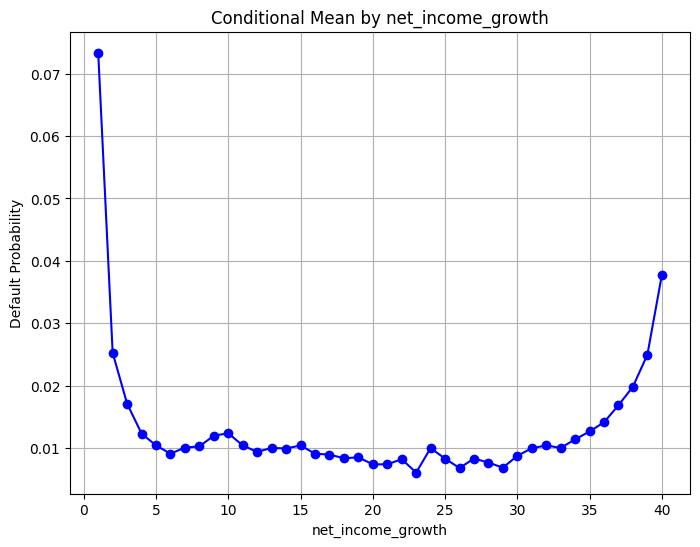

In [25]:
cut, bins = pd.qcut(df[field], q=50, labels=False, retbins=True, duplicates = 'drop')
cut+=1# Adding 1 to make quantiles start from 1
default_prob_values = df.groupby(cut)[['default']].mean()
# print(bins)
print(bins[-2],bins[-1])
plt.figure(figsize=(8, 6))
plt.plot(default_prob_values.index, default_prob_values.default, marker='o', linestyle='-', color='b')
plt.title(f'Conditional Mean by {field}')
plt.xlabel(field)
plt.ylabel('Default Probability')
plt.grid(True)
plt.show()

(53753,)


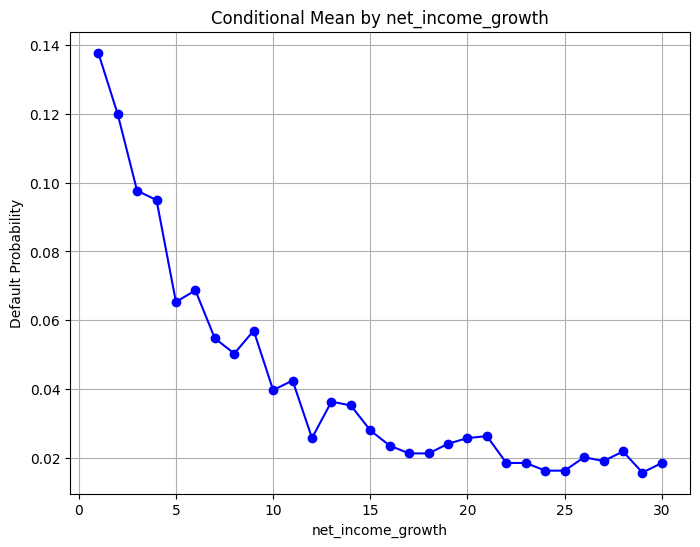

array([-2.02445801e+08, -4.18815763e+02, -1.97543621e+02, -1.21151652e+02,
       -8.53107010e+01, -6.42187428e+01, -5.14682022e+01, -4.21850252e+01,
       -3.52519309e+01, -3.02117715e+01, -2.60958872e+01, -2.28140502e+01,
       -2.01388996e+01, -1.79423192e+01, -1.60938967e+01, -1.45265391e+01,
       -1.31629571e+01, -1.20364711e+01, -1.10427968e+01, -1.01726502e+01,
       -9.37790246e+00, -8.72061295e+00, -8.12415832e+00, -7.58123005e+00,
       -7.09711318e+00, -6.64962635e+00, -6.24730230e+00, -5.88163759e+00,
       -5.56559809e+00, -5.27491348e+00, -5.00003019e+00])

In [26]:
cut_data = df[(df[field]<-5)][field]
print(cut_data.shape)
first_bins = viz(cut_data, field, 30)
first_bins

(971109,)


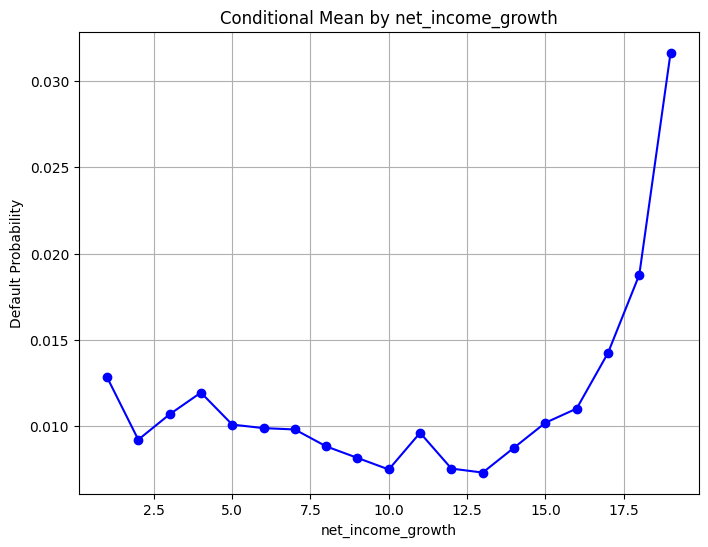

array([-5.19983287e+00, -2.23454065e+00, -1.38966016e+00, -1.06037585e+00,
       -9.27954505e-01, -7.85980022e-01, -6.39744883e-01, -4.96946529e-01,
       -3.60235976e-01, -2.30082148e-01, -1.05692060e-01,  0.00000000e+00,
        1.21843915e-01,  2.83396921e-01,  5.15502751e-01,  8.73299953e-01,
        1.49990490e+00,  2.85275160e+00,  7.33236524e+00,  5.60637990e+07])

In [27]:
cut_data = df[(df[field]>=-5.2)][field]
print(cut_data.shape)
second_bins = viz(cut_data, field, 25)
second_bins

In [28]:
income_growth_bins = sorted(np.concat((first_bins,second_bins)))

16.05707134120702 56063799.0


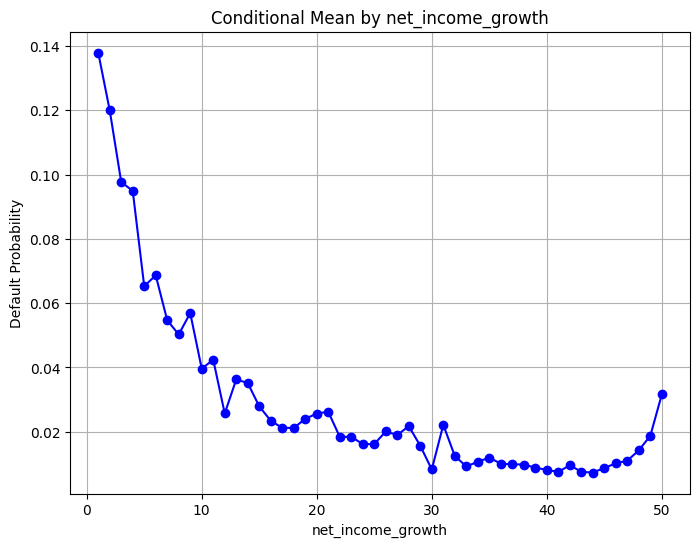

In [29]:
cut = pd.cut(df[field], bins=income_growth_bins, labels=False, duplicates = 'drop')
cut+=1# Adding 1 to make quantiles start from 1
default_prob_values = df.groupby(cut)[['default']].mean()
# print(bins)
print(bins[-2],bins[-1])
plt.figure(figsize=(8, 6))
plt.plot(default_prob_values.index, default_prob_values.default, marker='o', linestyle='-', color='b')
plt.title(f'Conditional Mean by {field}')
plt.xlabel(field)
plt.ylabel('Default Probability')
plt.grid(True)
plt.show()

In [30]:
# income_growth_bins

## cash_assets_ratio_quantile

In [31]:
field = 'cash_assets_ratio_quantile'

49.0 50.0


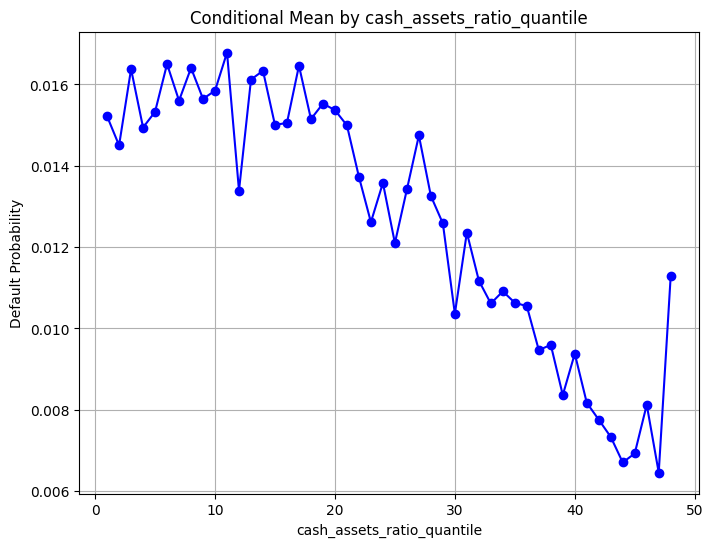

In [32]:
cut, bins = pd.qcut(df[field], q=50, labels=False, retbins=True, duplicates = 'drop')
cut+=1# Adding 1 to make quantiles start from 1
default_prob_values = df.groupby(cut)[['default']].mean()
# print(bins)
print(bins[-2],bins[-1])
plt.figure(figsize=(8, 6))
plt.plot(default_prob_values.index, default_prob_values.default, marker='o', linestyle='-', color='b')
plt.title(f'Conditional Mean by {field}')
plt.xlabel(field)
plt.ylabel('Default Probability')
plt.grid(True)
plt.show()

(1023552,)


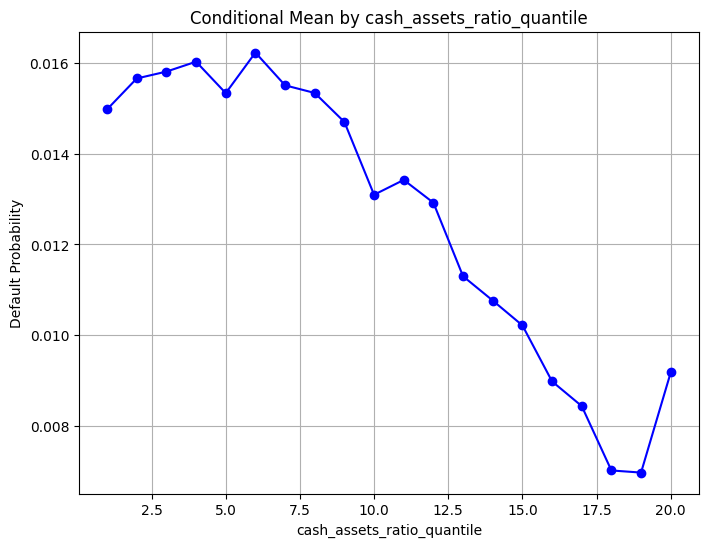

array([ 1.,  3.,  5.,  8., 10., 13., 15., 18., 20., 23., 25., 28., 30.,
       33., 35., 38., 40., 43., 45., 48., 50.])

In [33]:
cut_data = df[(df[field]<95)][field]
print(cut_data.shape)
first_bins = viz(cut_data, field, 20)
first_bins

In [34]:
# df[(df[field]>95)][field].nunique()

(0,)


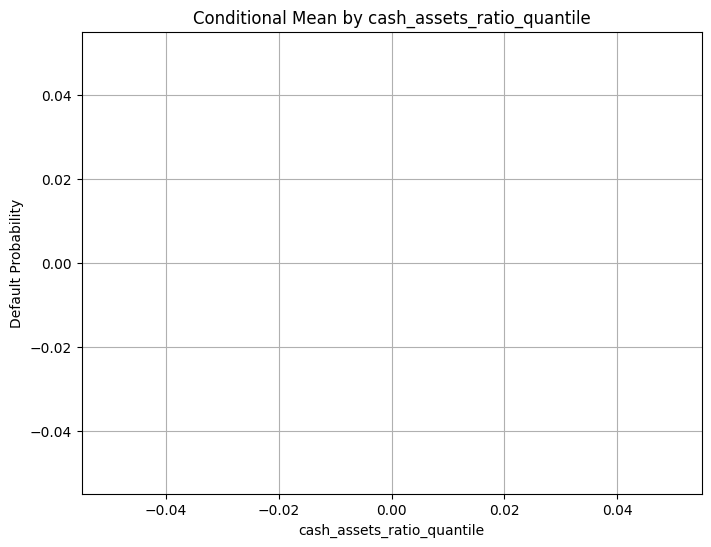

array([nan])

In [35]:
cut_data = df[(df[field]>95)][field]
print(cut_data.shape)
first_bins = viz(cut_data, field, 10)
first_bins

# ROE

In [71]:
field = 'roe'

In [103]:
# df[np.isinf(df['roe'])][['profit','eqty_tot']]

In [104]:
# df[field].value_counts().sort_index()

In [72]:
df[field].describe()

count   1023552.00
mean           NaN
std            NaN
min           -inf
25%          -0.02
50%           0.03
75%           0.15
max            inf
Name: roe, dtype: float64

(36706,)


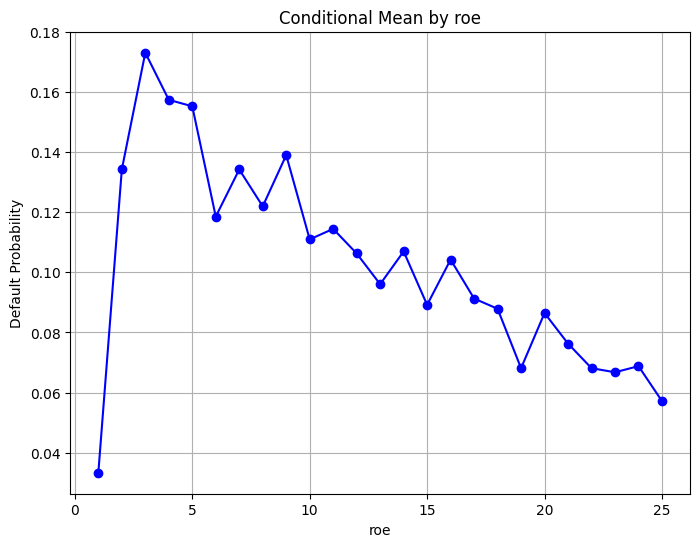

array([ 0.97001513,  0.99139105,  1.02223985,  1.04896852,  1.07780262,
        1.11057699,  1.14646218,  1.18682492,  1.23027673,  1.28400436,
        1.34534161,  1.41710663,  1.50097004,  1.59660575,  1.71350162,
        1.85434384,  2.03372139,  2.25536259,  2.54497319,  2.93139293,
        3.47485493,  4.37548947,  5.85370604,  8.78374927, 18.49845274])

In [137]:
cut_data = df[df[field]>0.97][field]
print(cut_data.shape)
first_bins = viz(cut_data, field, 25)[:-1]
first_bins

In [138]:
# cut_data = df[(df[field]>0.97)&(df[field]<1)][field]
# print(cut_data.shape)
# second_bins = viz(cut_data, field, 20)
# second_bins

(986846,)


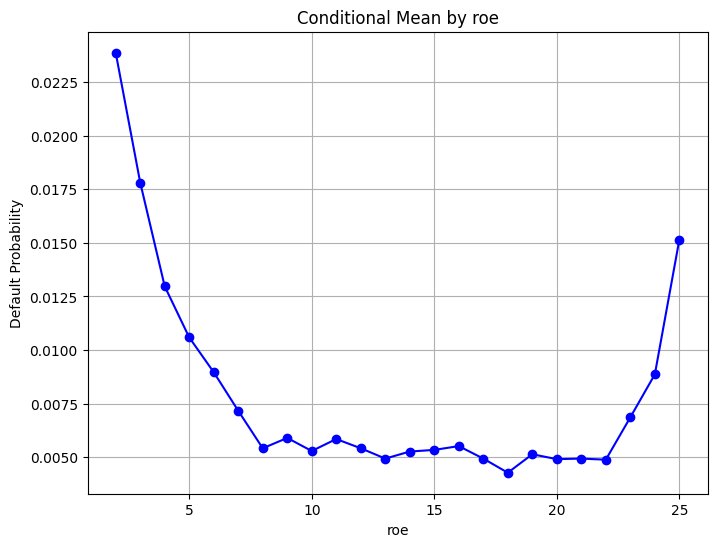

array([-1.211564  , -0.4418709 , -0.21628301, -0.11474846, -0.06137745,
       -0.03100798, -0.01308374, -0.00189355,  0.00230891,  0.00642992,
        0.01175708,  0.01842707,  0.02674117,  0.03712368,  0.04999707,
        0.06545977,  0.08425758,  0.10662053,  0.13378242,  0.16807137,
        0.21247752,  0.27373413,  0.36913214,  0.54601385,  0.96995068])

In [139]:
cut_data = df[(df[field]<=0.97)][field]
print(cut_data.shape)
third_bins = viz(cut_data, field, 25)[1:]
third_bins

In [140]:
roe_bins = np.concatenate((first_bins,  third_bins))
roe_bins = sorted(roe_bins)

0.8460988648460094 1.3148706835590005


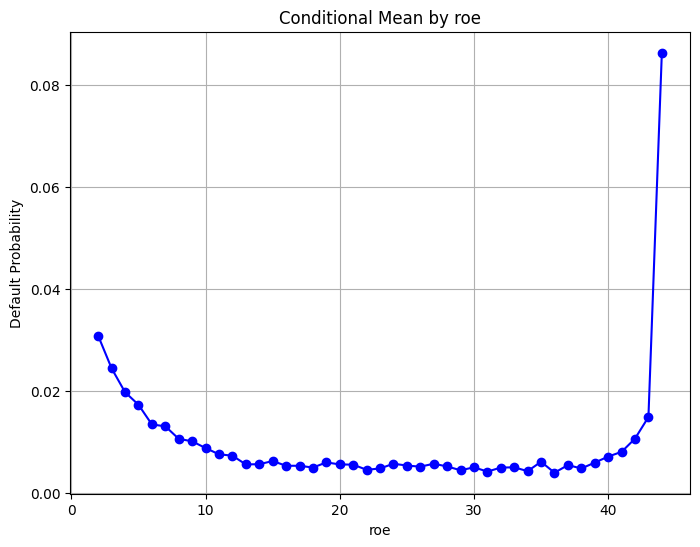

In [141]:
cut, bins = pd.qcut(df[field], q=45, labels=False, retbins=True, duplicates = 'drop')
cut+=1# Adding 1 to make quantiles start from 1
default_prob_values = df.groupby(cut)[['default']].mean()
# print(bins)
print(bins[-2],bins[-1])
plt.figure(figsize=(8, 6))
plt.plot(default_prob_values.index, default_prob_values.default, marker='o', linestyle='-', color='b')
plt.title(f'Conditional Mean by {field}')
plt.xlabel(field)
plt.ylabel('Default Probability')
plt.grid(True)
plt.show()

0.8460988648460094 1.3148706835590005


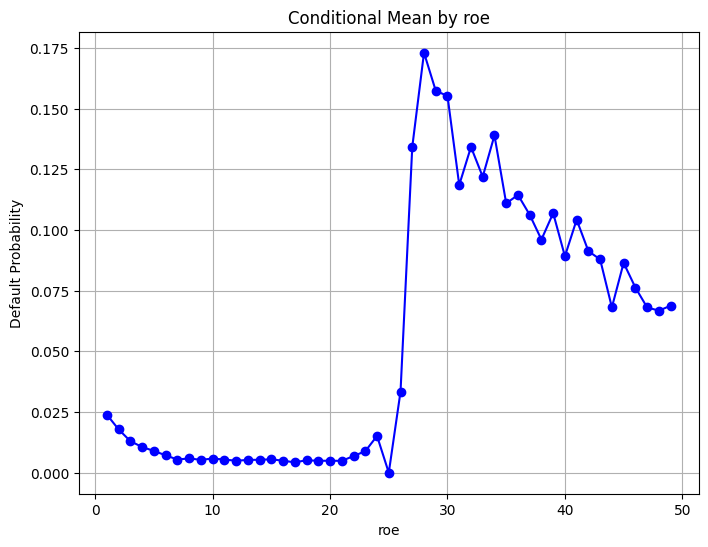

In [143]:
cut = pd.cut(df[field],bins=roe_bins, labels=False)
cut+=1# Adding 1 to make quantiles start from 1
default_prob_values = df.groupby(cut)[['default']].mean()
# print(bins)
print(bins[-2],bins[-1])
plt.figure(figsize=(8, 6))
plt.plot(default_prob_values.index, default_prob_values.default, marker='o', linestyle='-', color='b')
plt.title(f'Conditional Mean by {field}')
plt.xlabel(field)
plt.ylabel('Default Probability')
plt.grid(True)
plt.show()

In [36]:
viz_data = df[['financial_leverage','financial_leverage_quantile_values']].sort_values('financial_leverage')

In [38]:
cut = pd.cut(df['financial_leverage'], bins=financial_leverage_bins, labels=False, duplicates = 'drop')
cut+=1# Adding 1 to make quantiles start from 1
default_prob_values = df.groupby(cut)['default'].mean()
quantile_mean = df.groupby(cut)['financial_leverage'].mean()

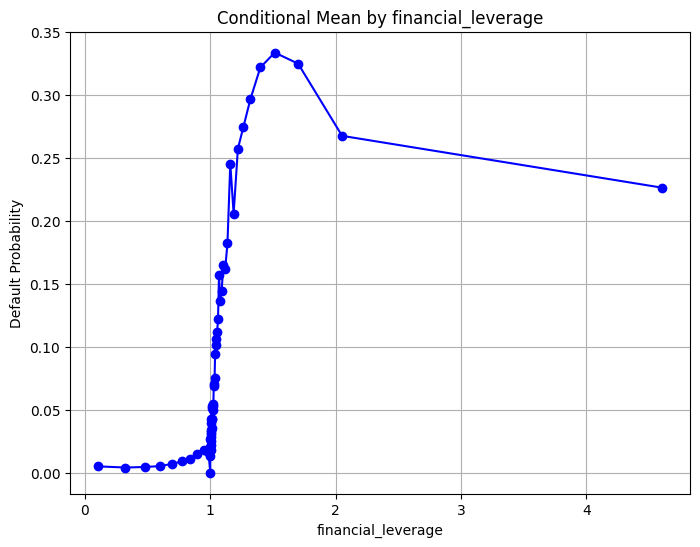

In [39]:


plt.figure(figsize=(8, 6))
plt.plot(quantile_mean, default_prob_values, marker='o', linestyle='-', color='b')
plt.title(f'Conditional Mean by financial_leverage')
plt.xlabel('financial_leverage')
plt.ylabel('Default Probability')
plt.grid(True)
plt.show()

## output

In [144]:
bins_dict = {
    'financial_leverage_quantile':financial_leverage_bins,
    'profitability_ratio_quantile':prof_ratio_bins,
    'net_income_growth_quantile':income_growth_bins,
    'roe_quantile':roe_bins
}

In [145]:
import pickle

In [146]:
with open('quantile_custom_bins.pkl', 'wb') as file:
    pickle.dump(bins_dict, file)

In [ ]:
### try running box cox transform before quantiles
### KDE on quantiles
###

In [257]:
from sklearn.neighbors import KernelDensity

In [267]:
default_prob_values

,default
profitability_ratio,
1.00,0.30
2.00,0.27
3.00,0.20
4.00,0.18
5.00,0.16
...,...
96.00,0.01
97.00,0.01
98.00,0.01


In [261]:
# default_prob_values

In [258]:
kde = KernelDensity(kernel='tophat', bandwidth=0.5)

array([0.30321665, 0.27105014, 0.20444865, 0.17928098, 0.15617605,
       0.12677389, 0.1097965 , 0.10217597, 0.09465215, 0.08183538,
       0.08282063, 0.07095553, 0.06575213, 0.06767629, 0.06054872,
       0.05205868, 0.05014191, 0.05773781, 0.04683065, 0.04022717,
       0.0487228 , 0.04353999, 0.03784295, 0.04353999, 0.03358562,
       0.02932829, 0.03360151, 0.02790918, 0.03549456, 0.02412488,
       0.0265026 , 0.02459792, 0.03076195, 0.03216651, 0.02366304,
       0.02317881, 0.02224326, 0.02601703, 0.02223273, 0.03028869,
       0.02034059, 0.02555608, 0.02223273, 0.02082347, 0.02743614,
       0.01751065, 0.0179754 , 0.01893043, 0.01844844, 0.01750237,
       0.01609087, 0.01371807, 0.01703739, 0.01324503, 0.01940369,
       0.01702933, 0.01135826, 0.01844844, 0.01609087, 0.0179754 ,
       0.01845717, 0.01513718, 0.01371807, 0.01419782, 0.01371807,
       0.0132513 , 0.01655629, 0.01845717, 0.01371807, 0.01183152,
       0.01844844, 0.01230478, 0.00993377, 0.00709891, 0.01277

In [288]:
kde.fit(default_prob_values['default'].values.reshape(-1,1))

KernelDensity(bandwidth=0.5, kernel='tophat')

In [295]:
from scipy.stats import gaussian_kde

In [325]:
cut_data = df[field]

cut, bins = pd.qcut(cut_data, q=100, labels=False, retbins=True, duplicates = 'drop')
cut+=1# Adding 1 to make quantiles start from 1
default_prob_values = df.groupby(cut)[['default']].mean()

In [326]:
test_df = df[[field,'default']]
test_df['default_prob_value'] = cut.to_frame().join(default_prob_values, how='left',on= field)['default']

,profitability_ratio,default,default_prob_value
0,0.02,0,0.00
1,-0.05,0,0.03
2,-0.04,0,0.02
3,-0.04,0,0.02
4,-0.04,0,0.02
...,...,...,...
1023547,0.00,0,0.01
1023548,0.00,0,0.01
1023549,-0.08,0,0.04
1023550,0.00,0,0.01


In [338]:
cut_data = df[(df[field]<-.01)][field]

cut, bins = pd.qcut(cut_data, q=10, labels=False, retbins=True, duplicates = 'drop')
cut+=1# Adding 1 to make quantiles start from 1
default_prob_values = df.groupby(cut)[['default']].mean()

In [339]:
default_prob_values

,default
profitability_ratio,
1.00,0.16
2.00,0.06
3.00,0.04
4.00,0.03
5.00,0.02
6.00,0.02
7.00,0.01
8.00,0.01
9.00,0.01


In [355]:
from statsmodels.nonparametric.kernel_regression import KernelReg


In [360]:
# quantile_centers

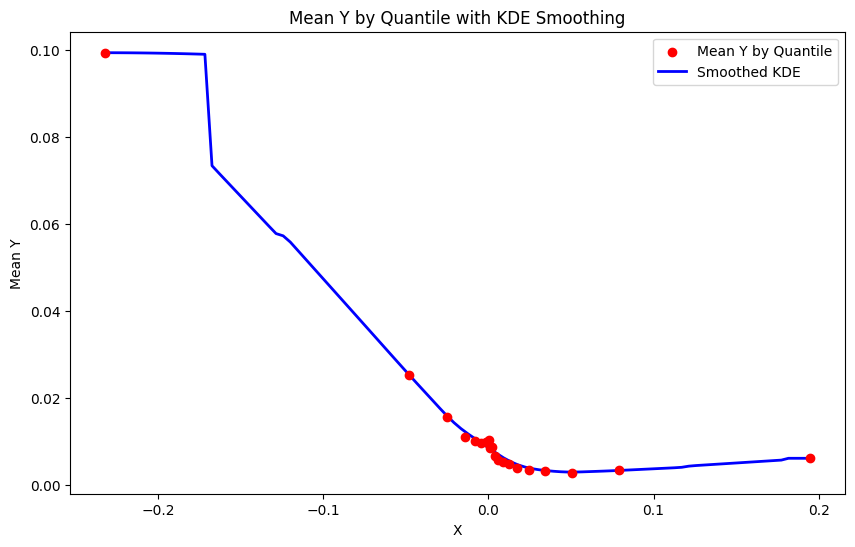

In [367]:
cut_data = df[field]

cut, bins = pd.qcut(cut_data, q=20, labels=False, retbins=True, duplicates = 'drop')
cut+=1# Adding 1 to make quantiles start from 1
default_prob_values = df.groupby(cut)['default'].mean().values
quantile_centers = df.groupby(cut)[field].mean().values


# Step 3: Apply KDE for smoothing
kreg = KernelReg(endog=default_prob_values, exog=quantile_centers, var_type='c', reg_type='ll', ckertype='gaussian')

smoothed_x = np.linspace(quantile_centers.min(), quantile_centers.max(), 100)
smoothed_y, _ = kreg.fit(smoothed_x)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(quantile_centers, default_prob_values, color='red', label='Mean Y by Quantile', zorder=5)
plt.plot(smoothed_x, smoothed_y, label='Smoothed KDE', color='blue', linewidth=2)



plt.xlabel('X')
plt.ylabel('Mean Y')
plt.legend()
plt.title("Mean Y by Quantile with KDE Smoothing")
plt.show()


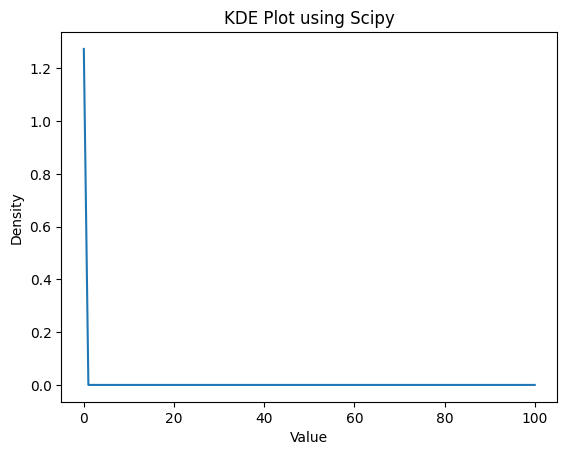

In [343]:
cut_data = df[(df[field]<-.01)][field]

cut, bins = pd.qcut(cut_data, q=100, labels=False, retbins=True, duplicates = 'drop')
cut+=1# Adding 1 to make quantiles start from 1
default_prob_values = df.groupby(cut)['default'].mean().values
quantile_centers = df.groupby(cut)[field].mean().values

kde = gaussian_kde(quantile_centers, weights=default_prob_values)
x_smooth = np.linspace(df[field].min(), df[field].max(), 1000)
x_smooth = np.linspace(0,100, 100)
y_smooth = kde(x_smooth)

# Plotting
plt.plot(x_smooth, y_smooth)
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("KDE Plot using Scipy")
plt.show()

In [341]:
kde(-1.5)

array([0.16240775])

array([0.30321665, 0.27105014, 0.20444865, 0.17928098, 0.15617605,
       0.12677389, 0.1097965 , 0.10217597, 0.09465215, 0.08183538,
       0.08282063, 0.07095553, 0.06575213, 0.06767629, 0.06054872,
       0.05205868, 0.05014191, 0.05773781, 0.04683065, 0.04022717,
       0.0487228 , 0.04353999, 0.03784295, 0.04353999, 0.03358562,
       0.02932829, 0.03360151, 0.02790918, 0.03549456, 0.02412488,
       0.0265026 , 0.02459792, 0.03076195, 0.03216651, 0.02366304,
       0.02317881, 0.02224326, 0.02601703, 0.02223273, 0.03028869,
       0.02034059, 0.02555608, 0.02223273, 0.02082347, 0.02743614,
       0.01751065, 0.0179754 , 0.01893043, 0.01844844, 0.01750237,
       0.01609087, 0.01371807, 0.01703739, 0.01324503, 0.01940369,
       0.01702933, 0.01135826, 0.01844844, 0.01609087, 0.0179754 ,
       0.01845717, 0.01513718, 0.01371807, 0.01419782, 0.01371807,
       0.0132513 , 0.01655629, 0.01845717, 0.01371807, 0.01183152,
       0.01844844, 0.01230478, 0.00993377, 0.00709891, 0.01277

In [309]:
df.groupby(cut)[field].mean()

profitability_ratio
1.00     -1.51
2.00     -0.61
3.00     -0.43
4.00     -0.34
5.00     -0.28
          ... 
96.00    -0.01
97.00    -0.01
98.00    -0.01
99.00    -0.01
100.00   -0.01
Name: profitability_ratio, Length: 100, dtype: float64